In [55]:
import pandas as pd
from string import punctuation
from sklearn.decomposition import PCA
import time
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
%matplotlib inline

In [56]:
file = 'https://raw.githubusercontent.com/grantaguinaldo/web-scraping/master/violations/final_violation_scrape.csv'
titlev = 'title-v-issued-active-facilities.csv'
reclaim = 'reclaim.csv'

In [57]:
df_all = pd.read_csv(file)
df_titleV = pd.read_csv(titlev)
df_reclaim = pd.read_csv(reclaim)

In [58]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN


In [59]:
df_all['type'] = ''

In [60]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [61]:
df_titleV.head()

,Facility ID,Facility Name,City,County,Initial Issue Date,Renewal Date
0,35188,3M COMPANY,MONROVIA,LA,6/17/13,NaN
1,800088,3M COMPANY,CORONA,RV,5/9/00,5/4/12
2,45489,"ABBOTT CARDIOVASCULAR SYSTEMS, INC.",TEMECULA,RV,10/26/01,1/11/12
3,47084,ADVANCE PAPER BOX CO,LOS ANGELES,LA,8/13/01,9/16/11
4,57390,ADVANCE TRUCK PAINTING INC,PICO RIVERA,LA,4/16/01,6/7/11


In [62]:
df_reclaim.head()

,Fac_id
0,136
1,346
2,550
3,1073
4,1744


In [63]:
reclaim_list = df_reclaim['Fac_id'].tolist()

In [64]:
titlev_list = df_titleV['Facility ID'].tolist()

In [65]:
reclaim_titlev_list = [facility for facility in titlev_list if facility in reclaim_list]

In [66]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        WBW
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipment                                                       NaN
 type                                                               
 Name: 475, dtype: object,
 facility id                                                  16, 20
 notification                                                 P57290
 Attorney                                                        FAC
 Total                                                         40000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data    failure to conduct NOx emissions checks monthl...
 equipm

In [67]:
for each in list_error:
    print(each['facility id'])

16, 20
16, 20
16, 20
2344 2
202, 2
31, 20
31, 20
10/1
10/1
10/1


In [68]:
for each in list_error:
    print(each['notification'])

P57290
P57290
P57290
P63673
HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [69]:
df_all.iloc[475]['facility id']
df_all.set_value(475, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [70]:
df_all.iloc[476]
df_all.set_value(476, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [71]:
df_all.iloc[477]
df_all.set_value(477, 'facility id', '50134')

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [72]:
df_all.iloc[1284]
df_all.set_value(1284, 'facility id', '2344')

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [73]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
list_error

[facility id                                                  202, 2
 notification                                                HRB2169
 Attorney                                                        INT
 Total                                                          1000
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equipment                                                       NaN
 type                                                               
 Name: 1695, dtype: object,
 facility id                                                  31, 20
 notification                                                  SRV97
 Attorney                                                        WBW
 Total                                                        213376
 url               http://www3.aqmd.gov/webappl/fim/prog/novdetai...
 violation_data                                                  NaN
 equip

In [74]:
for each in list_error:
    print(each['facility id'])

202, 2
31, 20
31, 20
10/1
10/1
10/1


In [75]:
for each in list_error:
    print(each['notification'])

HRB2169
SRV97
SRV97
HRB2187
HRB2191
HRB2191


In [76]:
df_all.drop(df_all.index[1695])

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,


In [77]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

1695
2066
2067
3138
3140
3141


In [78]:
df_all = df_all.drop(df_all.index[[1695,
2066,
2067,
3138,
3140,
3141]])

In [79]:
list_error = []
for index, row in df_all.iterrows():
    try:
        pd.to_numeric(row['facility id'])
    except:
        list_error.append(row)
        print(index)

In [80]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,


In [81]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in titlev_list:
            df_all.set_value(index, 'type', 't')
        elif float(row['facility id']) in reclaim_list:
            df_all.set_value(index, 'type', 'r')
        else:
            df_all.set_value(index, 'type', 'n')
    except:
        index_row.append(row)

In [82]:
index_row = []
for index, row in df_all.iterrows():
    try:
        if float(row['facility id']) in reclaim_titlev_list:
            df_all.set_value(index, 'type', 'rt')
    except:
        index_row.append(row)

In [83]:
df_all.head(50)

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,n
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,n
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,n
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,n
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,t
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,n


In [84]:
df_all.shape

(3682, 8)

In [85]:
df_rt = df_all[(df_all['type'] == 'rt')]
df_all

,facility id,notification,Attorney,Total,url,violation_data,equipment,type
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs. Inaccurate APEP.,NOx RECLAIM facility,rt
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,t
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,t
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,n
5,115862,P59039,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO CONDUCT REVERIFICATION TEST 6 MONTH...,NaN,n
6,115862,P61478,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failure to post permit on site. Failure to pro...,to repair/replace vapor recovery components wi...,n
7,115862,P61475,NSF,1000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating a gasoline dispensing facility contr...,NaN,n
8,800057,P52622,BTG,3000.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,"TWO VAPOR RECOVERY HOSES LEAKING ABOVE 3,000 P...",NaN,t
9,84456,P61702,NSF,2500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Operating an AJAX boiler rated at 4.25 million...,AJAX boiler rated at 4.25 million btu/hr,n


In [86]:
df_attorney = df_all[['type', 'Attorney']].groupby(['type', 'Attorney'])['Attorney'].count().unstack()
df_attorney.columns.tolist()

['AJO',
 'BBB',
 'BKT',
 'BST',
 'BTG',
 'FAC',
 'INT',
 'JMP',
 'KCM',
 'KRW',
 'LBN',
 'MJR',
 'NAS',
 'NOV',
 'NSF',
 'Nbr',
 'PH3',
 'RFL',
 'RRF',
 'SMP',
 'TCF',
 'TRB',
 'VKT',
 'WBW']

In [87]:
df_attorney

Attorney,AJO,BBB,BKT,BST,BTG,FAC,INT,JMP,KCM,KRW,...,NSF,Nbr,PH3,RFL,RRF,SMP,TCF,TRB,VKT,WBW
type,,,,,,,,,,,,,,,,,,,,,
n,NaN,4.0,2.0,7.0,56.0,103.0,1102.0,37.0,216.0,7.0,...,244.0,51.0,66.0,4.0,27.0,1.0,26.0,133.0,43.0,111.0
r,NaN,1.0,NaN,NaN,11.0,5.0,14.0,18.0,16.0,NaN,...,28.0,NaN,NaN,1.0,5.0,NaN,NaN,23.0,6.0,6.0
rt,2.0,1.0,NaN,1.0,12.0,8.0,31.0,16.0,33.0,8.0,...,73.0,2.0,NaN,NaN,4.0,NaN,1.0,64.0,1.0,7.0
t,2.0,NaN,NaN,4.0,10.0,7.0,40.0,10.0,62.0,3.0,...,20.0,3.0,1.0,NaN,16.0,1.0,1.0,45.0,4.0,6.0


In [88]:
df_facility_average = df_all.groupby(['type'], as_index=False).mean()
df_facility_average

,type,Total
0,n,11762.097454
1,r,38479.358108
2,rt,523801.033898
3,t,446882.295084


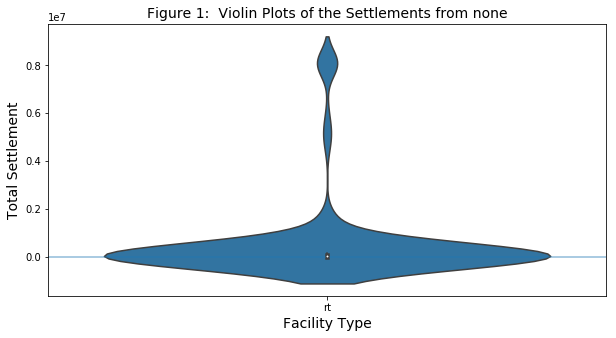

In [89]:
df_rt = df_all[df_all['type'] == 'rt']
plt.figure(figsize = (10, 5))
sns.violinplot(x = df_rt['type'], y=df_rt['Total'])
plt.xlabel('Facility Type', fontsize = 14)
plt.ylabel('Total Settlement', fontsize = 14)
plt.axhline(y = 29, alpha = 0.5)
plt.title('Figure 1:  Violin Plots of the Settlements from none', fontsize = 14)
plt.show()

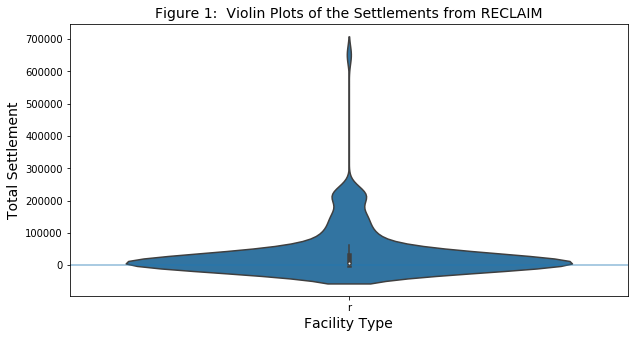

In [90]:
df_r = df_all[df_all['type'] == 'r']
plt.figure(figsize = (10, 5))
sns.violinplot(x = df_r['type'], y=df_r['Total'])
plt.xlabel('Facility Type', fontsize = 14)
plt.ylabel('Total Settlement', fontsize = 14)
plt.axhline(y = 29, alpha = 0.5)
plt.title('Figure 1:  Violin Plots of the Settlements from RECLAIM', fontsize = 14)
plt.show()

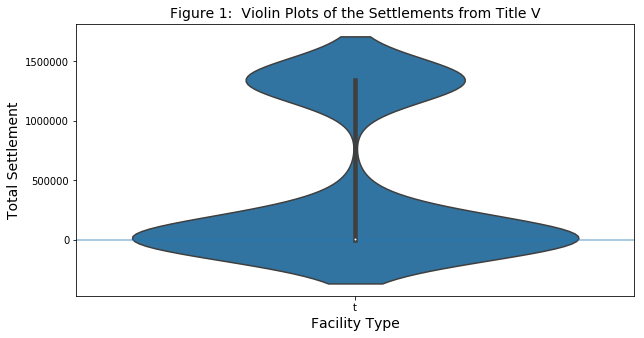

In [91]:
df_t = df_all[df_all['type'] == 't']
plt.figure(figsize = (10, 5))
sns.violinplot(x = df_t['type'], y=df_t['Total'])
plt.xlabel('Facility Type', fontsize = 14)
plt.ylabel('Total Settlement', fontsize = 14)
plt.axhline(y = 29, alpha = 0.5)
plt.title('Figure 1:  Violin Plots of the Settlements from Title V', fontsize = 14)
plt.show()

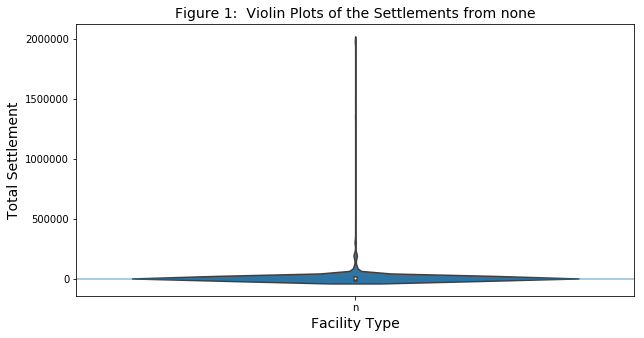

In [92]:
df_none = df_all[df_all['type'] == 'n']
plt.figure(figsize = (10, 5))
sns.violinplot(x = df_none['type'], y=df_none['Total'])
plt.xlabel('Facility Type', fontsize = 14)
plt.ylabel('Total Settlement', fontsize = 14)
plt.axhline(y = 29, alpha = 0.5)
plt.title('Figure 1:  Violin Plots of the Settlements from none', fontsize = 14)
plt.show()

In [93]:
from string import punctuation

In [94]:
punctuation_symbols = []
for each in list(punctuation):
    punctuation_symbols.append((each))

In [95]:
set(df_all['type'].tolist())

{'n', 'r', 'rt', 't'}

In [96]:
len(df_all['type'].tolist())

3682

In [97]:
df_all = df_all.dropna(subset=['violation_data'])
df_all.shape

(3336, 8)

In [98]:
def remove_puncuation(d):
    for each in punctuation_symbols:
        d = d.replace(each, '')
    return d

In [99]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

In [100]:
df_all['violation_data'] = df_all.violation_data.apply(remove_digits)
df_all['violation_data'] = df_all.violation_data.apply(remove_puncuation)

/Users/gta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [234]:
min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(7,8))

In [224]:
X = df_all['violation_data']
y = df_all['type']

In [225]:
df_all.head()

,facility id,notification,Attorney,Total,url,violation_data,equipment,type,cluster_affiliation
0,3704,P56324,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Failed to reconcile quarterly NOx emissions in...,NOX RECLAIM facility,rt,0
1,3704,P56323,KCM,7200.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Inaccurate QCERs Inaccurate APEP,NOx RECLAIM facility,rt,0
2,2526,P37231,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO KEEP THE ROOF OF INTERNAL FLOATING ...,NaN,t,0
3,2526,P37230,BTG,3500.00,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,FAILURE TO OPERATE AND MAINTAIN A CONTINUOUS M...,NaN,t,0
4,158141,P60306,WBW,9438.66,http://www3.aqmd.gov/webappl/fim/prog/novdetai...,Selling architectural coatings within the SCAQ...,NaN,n,0


In [226]:
X_dtm = vect.fit_transform(X)

In [227]:
len(vect.get_feature_names())

15

In [228]:
feature_matrix = pd.DataFrame(X_dtm.toarray(), columns=vect.get_feature_names())
feature_matrix.head()

,air contaminants cause injury detriment nuisance annoyance,air contaminants cause injury detriment nuisance annoyance considerable,cause injury detriment nuisance annoyance considerable number,cause injury detriment nuisance annoyance considerable number persons,contaminants cause injury detriment nuisance annoyance considerable,contaminants cause injury detriment nuisance annoyance considerable number,discharging quantities air contaminants cause injury detriment,discharging quantities air contaminants cause injury detriment nuisance,exceeded annual nox emissions allocation effect end,gasoline dispensing facility contrary carb executive orders,injury detriment nuisance annoyance considerable number persons,operating gasoline dispensing facility contrary carb executive,operating gasoline dispensing facility contrary carb executive orders,quantities air contaminants cause injury detriment nuisance,quantities air contaminants cause injury detriment nuisance annoyance
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [300]:
pca = PCA(n_components=2)
pc_vectors = pca.fit_transform(feature_matrix)

In [301]:
np.sum(pca.explained_variance_ratio_)

0.9517099338848376

In [302]:
print(pca.explained_variance_ratio_)

[ 0.88880848  0.06290145]


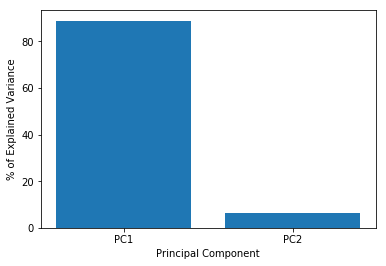

In [303]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.xlabel('Principal Component')
plt.ylabel('% of Explained Variance')
plt.show()

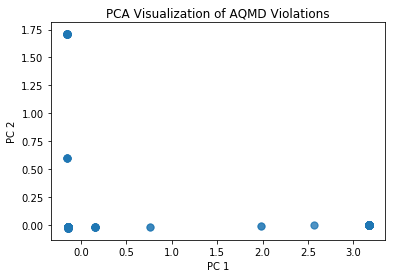

In [304]:
fig, ax = plt.subplots()
plt.scatter(pc_vectors[:, 0], pc_vectors[:, 1], s=50, cmap='viridis', alpha=0.4)
plt.title('PCA Visualization of AQMD Violations')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [222]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pc_vectors)
centroids = pd.DataFrame(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(pc_vectors)

In [209]:
df_all['cluster_affiliation'] = y_kmeans

/Users/gta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


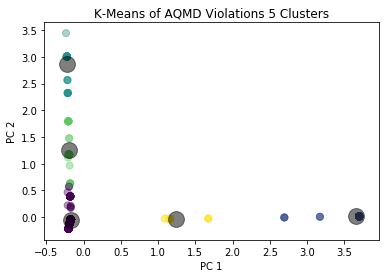

In [210]:
fig, ax = plt.subplots()
plt.scatter(pc_vectors[:, 0], pc_vectors[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.4)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=250, alpha=0.5)
plt.title('K-Means of AQMD Violations ' + str(n_clusters) + ' Clusters')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [288]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
X = df_all['violation_data']
y = df_all['type']

min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(5,8))
X_dtm = vect.fit_transform(X)

In [289]:
nb.fit(X_dtm, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [290]:
X_tokens = vect.get_feature_names()
len(X_tokens)

55

In [291]:
nb.feature_count_.shape

(4, 55)

In [292]:
nb.class_count_

array([ 2552.,   142.,   282.,   360.])

In [293]:
none_count = nb.feature_count_[0, :]
reclaim_count = nb.feature_count_[1,:]
reclaim_titlev_count = nb.feature_count_[2,:]
titlev_count = nb.feature_count_[3,:]

In [294]:
tokens = pd.DataFrame({'token': X_tokens, 
                       'none': none_count, 
                       'reclaim': reclaim_count, 
                       'reclaim_titlev': reclaim_titlev_count,
                       'titlev': titlev_count}).set_index('token')

In [295]:
tokens

,none,reclaim,reclaim_titlev,titlev
token,,,,
air contaminants cause injury detriment,1.0,0.0,0.0,144.0
air contaminants cause injury detriment nuisance,1.0,0.0,0.0,142.0
air contaminants cause injury detriment nuisance annoyance,1.0,0.0,0.0,142.0
air contaminants cause injury detriment nuisance annoyance considerable,1.0,0.0,0.0,142.0
annual nox emissions allocation effect,1.0,19.0,17.0,0.0
annual nox emissions allocation effect end,1.0,17.0,17.0,0.0
carb executive orders manufacturers specifications,34.0,1.0,1.0,0.0
cause injury detriment nuisance annoyance,4.0,0.0,0.0,143.0
cause injury detriment nuisance annoyance considerable,4.0,0.0,0.0,143.0


In [296]:
# Need to determine the similarity of each coprus (r, t, rt n) to see if there is a difference between each dataset
#Possible to calculate the dot product between to vectors and see what is the angle bewteen then.  
#Calcuate the cosine similarity.

In [244]:
df_none = df_all[df_all['type'] == 'n'].reset_index(drop=True)
df_titlev = df_all[df_all['type'] == 't'].reset_index(drop=True)
df_reclaim = df_all[df_all['type'] == 'r'].reset_index(drop=True)
df_reclaim_titlev = df_all[df_all['type'] == 'rt'].reset_index(drop=True)

In [245]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [246]:
X_train = df_none['violation_data']

In [247]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [250]:
X_train = df_none['violation_data']
no_features = 2000
no_topics = 10
no_top_words = 15


min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(7,8))


tf = vect.fit_transform(X_train)
tf_feature_names = tf_vect.get_feature_names()

lda = LatentDirichletAllocation(n_components=no_topics, max_iter=20, learning_method='batch', learning_offset=50.,random_state=0).fit(tf)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
air allows acc allowed according abrasive accurate
Topic 1:
air allows acc allowed according abrasive accurate
Topic 2:
air allows acc allowed according abrasive accurate
Topic 3:
abrasive air allows acc allowed according accurate
Topic 4:
acc air allows allowed according abrasive accurate
Topic 5:
allowed according air allows acc abrasive accurate
Topic 6:
allows air acc allowed according abrasive accurate
Topic 7:
accurate allowed according abrasive air allows acc
Topic 8:
air allows acc allowed according abrasive accurate
Topic 9:
air allows acc allowed according abrasive accurate


In [249]:
X_train = df_titlev['violation_data']
no_features = 1000
no_topics = 10
no_top_words = 15

tf_vect = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vect.fit_transform(X_train)
tf_feature_names = tf_vect.get_feature_names()

lda = LatentDirichletAllocation(n_components=no_topics, max_iter=20, learning_method='batch', learning_offset=50.,random_state=0).fit(tf)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
permit manner condition period engine report tank contrary failed operating exceeding reporting internal concentration source
Topic 1:
submit permit failure days application title renewal prior date expiration facility timely semiannual compliance report
Topic 2:
number considerable air persons injury detriment annoyance discharging nuisance contaminants quantities cause quanitities persions cuase
Topic 3:
public company caused july failed safety comfort contaminates discharged endanger health respose abrasive blasting perform
Topic 4:
ppm excess voc leaking failure tc issued compliance submit accurate reclaim exceed mixer year quarter
Topic 5:
title permit failure operate facility compliance conditions submit failed renewal equipment timely specified operating rule
Topic 6:
failure submit sam form acc conduct required failing timely scaqmd inspection meet emission prd calendar
Topic 7:
permit condition operating failure contrary maintain comply po boiler rule operate continuo

In [107]:
X_train = df_reclaim['violation_data']
no_features = 1000
no_topics = 10
no_top_words = 15

tf_vect = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vect.fit_transform(X_train)
tf_feature_names = tf_vect.get_feature_names()

lda = LatentDirichletAllocation(n_components=no_topics, max_iter=20, learning_method='batch', learning_offset=50.,random_state=0).fit(tf)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
failed facility emissions quarterly registration date reports applicable calculate reporting protocols monitoring according days daily
Topic 1:
failure condition persons public meter comply test source audit nuisance discharged air caused secnd beginng
Topic 2:
submit quarter failure days failed qcer report timely manner following end electronic quarterly emissions required
Topic 3:
rd quarter nd quarters cycle emissions st report nox electronically failed greater submitted qcers process
Topic 4:
facility failed emissions limit nox total transmit major source report quarterly failure electronically nd excavation
Topic 5:
year compliance report emissions permit apep submit failure annual program cycle failing day did accurately
Topic 6:
nox emissions end year compliance failed reconcile exceeded quarter annual effect allocation beginning qrtr quarterly
Topic 7:
permit failure title operating rule facility late operate qcer conditions terms specified contrary equipment requireme

In [108]:
X_train = df_reclaim_titlev['violation_data']
no_features = 1000
no_topics = 10
no_top_words = 15

tf_vect = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vect.fit_transform(X_train)
tf_feature_names = tf_vect.get_feature_names()

lda = LatentDirichletAllocation(n_components=no_topics, max_iter=20, learning_method='batch', learning_offset=50.,random_state=0).fit(tf)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
ppm vapor title leak leaks permit greater voc ended open conditions water line compliance tag
Topic 1:
failure report emissions submit data daily inaccurate electronically timely manner nd th qcer st missing
Topic 2:
operation rto limit failure fuel ppm late submittal monitoring scr submitted printing exceeded tank exceeding
Topic 3:
permit condition failure facility comply operating device conditions conduct contrary section test failing limit tank
Topic 4:
facility submitted qcer limit nox failed inaccurate quarter emission permit operate cycle source ppm title
Topic 5:
second qrtr emsns qrtrs enissions yr emission emmsns allctn nox qtr end failed reconcile annual
Topic 6:
nox emissions year end compliance quarter failed exceeded annual reconcile allocation effect beginning quarterly rd
Topic 7:
ppm service light components voc counts greater violation tag operating leak liquidgasvapor tank leaking cover
Topic 8:
quarter reclaim source certification audit quarterly nox fuel 

In [92]:
#http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/

In [265]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

nb = MultinomialNB()

min_df = 0.01
max_df = 0.90
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(3,5))

In [266]:
X = df_all['violation_data']
y = df_all['type']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [268]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2502,)
(834,)
(2502,)
(834,)


In [269]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(2502, 128)

In [270]:
X_test_dtm = vect.transform(X_test)
X_test_dtm.shape

(834, 128)

In [271]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [272]:
y_pred_type = nb.predict(X_test_dtm)

In [273]:
metrics.confusion_matrix(y_test, y_pred_type)

array([[629,   0,   2,   3],
       [ 34,   1,   7,   0],
       [ 50,   0,   8,   0],
       [ 55,   0,   0,  45]])

In [274]:
metrics.accuracy_score(y_test, y_pred_type)

0.81894484412470026

In [275]:
null = (608+1+12+13) / ((4+15+22+1+13+8+34+3+18+13+69) + (608+1+12+13))
null

0.7601918465227818

In [276]:
results = model_selection.cross_val_score(nb, 
                                          X_train_dtm, y_train, 
                                          cv=model_selection.KFold(n_splits=10, 
                                                                   random_state=1), scoring='accuracy')
print("Average Accuracy of a 10-fold cross validation: %.3f" % (results.mean()))

Average Accuracy of a 10-fold cross validation: 0.808


In [277]:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
print(classification_report(y_test, y_pred_type))

             precision    recall  f1-score   support

          n       0.82      0.99      0.90       634
          r       1.00      0.02      0.05        42
         rt       0.47      0.14      0.21        58
          t       0.94      0.45      0.61       100

avg / total       0.82      0.82      0.77       834

